In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import datetime as dt
from sklearn.model_selection import train_test_split
from datetime import datetime


from querys import get_usd, get_usd_of, get_usd_var, get_milestones

In [2]:
usd = get_usd()
usd_oficial = get_usd_of()

In [4]:
usd_full = pd.merge(usd_oficial, usd, how='right',on='fecha')
#usd_full.rename(columns={'d':'fecha','v_x':'dolar_oficial','v_y':'dolar_blue'}, inplace = True)

In [5]:

#tomamos desde el 2015 para reducir el error de la regresion lineal, dado que...
usd_full = usd_full[usd_full.fecha >'2018-01-01']

<AxesSubplot:xlabel='fecha', ylabel='dolar_blue'>

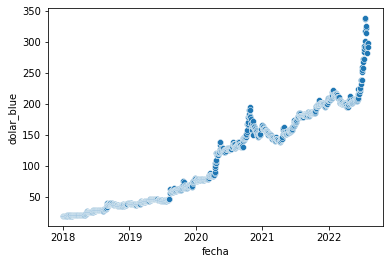

In [6]:
sns.scatterplot(x='fecha', y='dolar_blue', data =usd_full)

In [7]:
usd_full['fecha_numerico']= usd_full['fecha'].map(dt.datetime.toordinal)

In [8]:
X = usd_full['fecha_numerico'].values.reshape(-1,1)
y = usd_full['dolar_blue'].values.reshape(-1,1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
modelo = LinearRegression(fit_intercept=True)

In [11]:
modelo.fit(X_train, y_train)

LinearRegression()

In [12]:
from sklearn.metrics import mean_squared_error
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

Error en datos de train: 321.0984553331966
Error en datos de test: 350.60474962600165


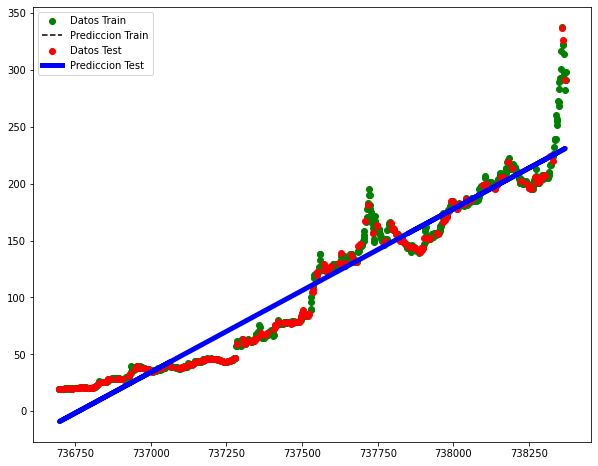

In [13]:
plt.figure(figsize = (10,8))

plt.scatter(X_train, y_train,  color='green', label = 'Datos Train')
plt.plot(X_train, y_train_pred, color='k', linestyle = '--', label = 'Prediccion Train')

plt.scatter(X_test, y_test,  color='red', label = 'Datos Test')
plt.plot(X_test, y_test_pred, color='blue', linewidth=5.0, label = 'Prediccion Test')

plt.legend()
plt.show()

In [14]:
usd_full['fecha'] = pd.to_datetime(usd_full['fecha'])
usd_full['mes'] = pd.DatetimeIndex(usd_full['fecha']).month

In [15]:
fecha_prediccion = '2023-01-01'
fecha_prediccion = datetime.strptime(fecha_prediccion, '%Y-%m-%d').date()
fecha_prediccion

datetime.date(2023, 1, 1)

In [16]:
fecha_prediccion = fecha_prediccion.toordinal()
fecha_prediccion = np.array(fecha_prediccion)
fecha_prediccion = fecha_prediccion.reshape(-1,1)

In [17]:
fecha_prediccion

array([[738521]])

In [18]:
cantidad_prediccion = modelo.predict(fecha_prediccion)
cantidad_prediccion

array([[252.78153499]])

In [ ]:
print('La cantidad que se predice es :' + str(round(cantidad_prediccion[0][0],2)))

La cantidad que se predice es :251.74


In [19]:
usd_predict = usd_full.copy(deep=True)

# Grafica predicion


In [20]:
arr = []
fecha = []
x = fecha_prediccion[0][0]
c = usd_predict['fecha_numerico'].max()+1
while c < x+1:
    arr.append(c)
    d = datetime.fromordinal(c)
    fecha.append(d.date())
    c += 1
fecha_numerico = pd.Series(arr)
print(type(fecha[0]))


<class 'datetime.date'>


In [22]:
fecha

[datetime.date(2022, 8, 5),
 datetime.date(2022, 8, 6),
 datetime.date(2022, 8, 7),
 datetime.date(2022, 8, 8),
 datetime.date(2022, 8, 9),
 datetime.date(2022, 8, 10),
 datetime.date(2022, 8, 11),
 datetime.date(2022, 8, 12),
 datetime.date(2022, 8, 13),
 datetime.date(2022, 8, 14),
 datetime.date(2022, 8, 15),
 datetime.date(2022, 8, 16),
 datetime.date(2022, 8, 17),
 datetime.date(2022, 8, 18),
 datetime.date(2022, 8, 19),
 datetime.date(2022, 8, 20),
 datetime.date(2022, 8, 21),
 datetime.date(2022, 8, 22),
 datetime.date(2022, 8, 23),
 datetime.date(2022, 8, 24),
 datetime.date(2022, 8, 25),
 datetime.date(2022, 8, 26),
 datetime.date(2022, 8, 27),
 datetime.date(2022, 8, 28),
 datetime.date(2022, 8, 29),
 datetime.date(2022, 8, 30),
 datetime.date(2022, 8, 31),
 datetime.date(2022, 9, 1),
 datetime.date(2022, 9, 2),
 datetime.date(2022, 9, 3),
 datetime.date(2022, 9, 4),
 datetime.date(2022, 9, 5),
 datetime.date(2022, 9, 6),
 datetime.date(2022, 9, 7),
 datetime.date(2022, 9, 8)

In [ ]:
new_x = np.array(arr).reshape(-1,1)
new_x


In [ ]:
y_test_pred_2023 = modelo.predict(new_x)

In [ ]:
to_concat = {
    'fecha': fecha,
    'dolar_oficial': np.arange(0,len(arr)),
    'dolar_blue': y_test_pred_2023.flatten(),
    'fecha_numerico':arr
}

In [ ]:
to_concat = pd.DataFrame(to_concat)
frames = [usd_predict, to_concat]
result = pd.concat(frames)
result['fecha'] = pd.to_datetime(result['fecha'])

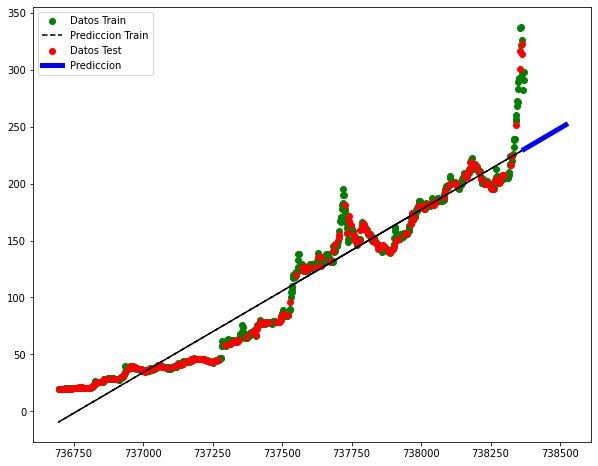

In [ ]:
plt.figure(figsize = (10,8))

plt.scatter(X_train, y_train,  color='green', label = 'Datos Train')
plt.plot(X_train, y_train_pred, color='k', linestyle = '--', label = 'Prediccion Train')

plt.scatter(X_test, y_test,  color='red', label = 'Datos Test')

plt.plot(arr, y_test_pred_2023, color='blue', linewidth = 5, label = 'Prediccion')

plt.legend()
plt.show()